In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

In [154]:
df = pd.read_csv("/content/drive/MyDrive/Data_Science_Projects/Job_Placement_Project/job_placement.csv")

In [155]:
df.head()

,name,gender,age,degree,stream,college_name,gpa,salary,years_of_experience,placement_status
0,Jessica Smith,Male,24,Bachelor's,Computer Science,Carnegie Mellon University,3.8,75000.0,2.0,Placed
1,James Lee,Female,23,Bachelor's,Computer Science,"University of California, Berkeley",3.7,NaN,NaN,Not Placed
2,Sarah Brown,Female,23,Bachelor's,Computer Science,Massachusetts Institute of Technology,3.9,NaN,NaN,Not Placed
3,Amanda Lee,Male,24,Bachelor's,Computer Science,University of Chicago,3.8,78000.0,3.0,Placed
4,Michael Brown,Male,24,Bachelor's,Computer Science,California Institute of Technology,3.4,NaN,NaN,Not Placed


In [156]:
df.describe()

,age,gpa,salary,years_of_experience
count,700.000000,700.000000,361.000000,361.000000
mean,24.510000,3.650143,74349.030471,2.033241
std,1.144077,0.147705,2580.117440,0.819216
min,23.000000,3.400000,70000.000000,1.000000
25%,23.000000,3.500000,72000.000000,1.000000
50%,25.000000,3.600000,74500.000000,2.000000
75%,26.000000,3.800000,76500.000000,3.000000
max,26.000000,3.900000,78500.000000,3.000000


In [157]:
df.shape

(700, 10)

In [158]:
df.isna().sum()

name                     0
gender                   0
age                      0
degree                   0
stream                   0
college_name             0
gpa                      0
salary                 339
years_of_experience    339
placement_status         0
dtype: int64

In [159]:
df["salary"].fillna(0, inplace=True)
df["years_of_experience"].fillna(0, inplace=True)

In [160]:
df.isna().sum()

name                   0
gender                 0
age                    0
degree                 0
stream                 0
college_name           0
gpa                    0
salary                 0
years_of_experience    0
placement_status       0
dtype: int64

In [161]:
titles = ["gender", "degree", "stream", "college_name", "placement_status"]

##Categorical counts


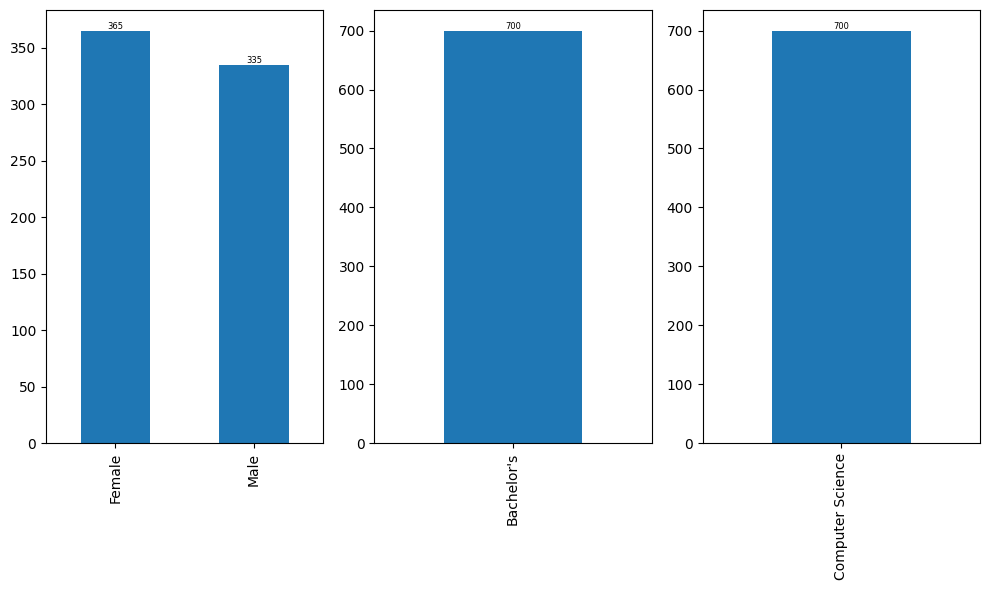

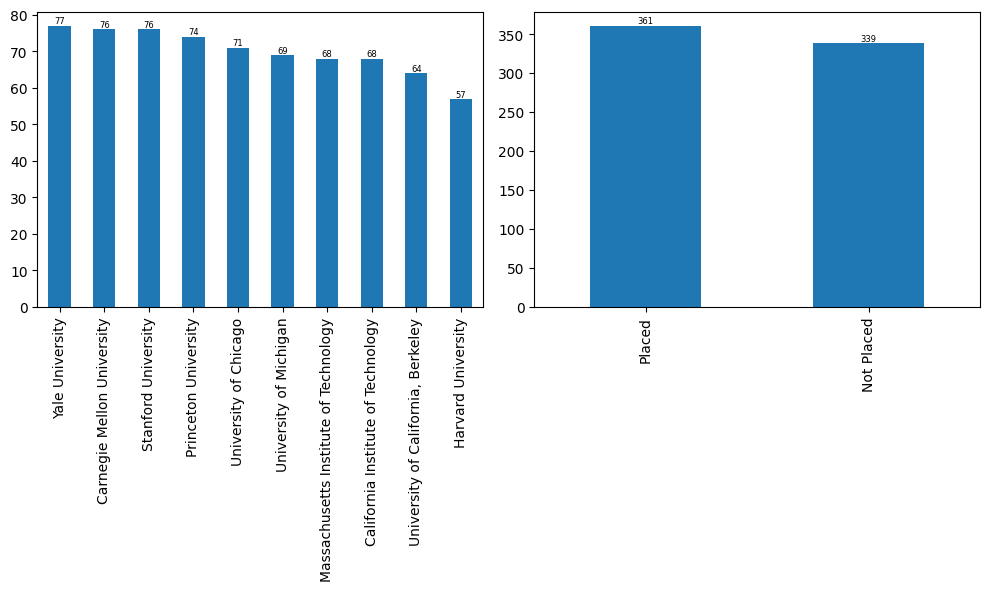

In [162]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
index = 0
for i in range(3):
    counts = df[titles[index]].value_counts()
    counts.plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container, size=6)
    index += 1
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
for i in range(2):
    counts = df[titles[index]].value_counts()
    counts.plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container, size=6)
    index += 1

plt.tight_layout()
plt.show()

## Filtered df - Filter colleges that have only one person

In [163]:
college_counts = df['college_name'].value_counts()
college_counts

Yale University                          77
Carnegie Mellon University               76
Stanford University                      76
Princeton University                     74
University of Chicago                    71
University of Michigan                   69
Massachusetts Institute of Technology    68
California Institute of Technology       68
University of California, Berkeley       64
Harvard University                       57
Name: college_name, dtype: int64

#Categorical-Categorical:

In [164]:
fig = px.parallel_categories(df[[titles[0], titles[-1]]])
fig.show()
pd.crosstab(df[titles[0]], df[titles[-1]])

placement_status,Not Placed,Placed
gender,,
Female,175,190
Male,164,171


In [165]:
fig = px.parallel_categories(df[[titles[2], titles[-1]]])
fig.show()
pd.crosstab(df[titles[2]], df[titles[-1]])

placement_status,Not Placed,Placed
stream,,
Computer Science,339,361


In [166]:
fig = px.parallel_categories(df[["college_name", "placement_status"]])
fig.show()
pd.crosstab(df["college_name"], df["placement_status"])

placement_status,Not Placed,Placed
college_name,,
California Institute of Technology,36,32
Carnegie Mellon University,35,41
Harvard University,26,31
Massachusetts Institute of Technology,32,36
Princeton University,34,40
Stanford University,37,39
"University of California, Berkeley",24,40
University of Chicago,32,39
University of Michigan,41,28


Add Numerical column of Placement Status to Filtered Data

##Numeric-Numeric

In [167]:
# plt.figure(figsize=[8,5])
# filtered_df.groupby(['college_name','placement_status'])[['placement_status']].mean().plot(kind="bar")
# plt.title("Placement Status by College")
# plt.show()
res1 = df.groupby(['college_name','placement_status'])['placement_status'].size().reset_index(name='placement_size')
res1
agegp = px.bar(data_frame=res1, x='college_name', y='placement_size', color='placement_status', title='Placement Status by College').update_layout(xaxis_title='college', yaxis_title='placement size')
agegp.show()


In [168]:
res2 = df.groupby(['age','placement_status'])['placement_status'].size().reset_index(name='placement_size')
res2
agegp = px.bar(data_frame=res2, x='age', y='placement_size', color='placement_status', title='Placement Status by Age').update_layout(xaxis_title='age', yaxis_title='placement size')
agegp.show()

In [169]:
res3 = df.groupby(['years_of_experience','placement_status'])['placement_status'].size().reset_index(name='placement_size')
res3
agegp = px.bar(data_frame=res3, x='years_of_experience', y='placement_size', color='placement_status', title='Placement Status by Years of experience').update_layout(xaxis_title='years of experience', yaxis_title='placement size')
agegp.show()

In [170]:
# Calculate the mean years of experience for each placement status
mean_experience = df.groupby('placement_status')['years_of_experience'].mean()

# Create a bar plot using Plotly
fig = px.bar(mean_experience, x=mean_experience.index, y='years_of_experience',
             labels={'placement_status': 'Placement Status', 'years_of_experience': 'Mean Years of Experience'},
             title='Years of experience by Placement Status')
fig

In [171]:
res4 = df.groupby(['gpa','placement_status'])['placement_status'].size().reset_index(name='placement_size')
res4
agegp = px.bar(data_frame=res4, x='gpa', y='placement_size', color='placement_status', title='Placement Status by GPA').update_layout(xaxis_title='GPA', yaxis_title='placement size')
agegp.show()

In [172]:
fig = px.parallel_categories(df[["gpa", "placement_status"]])
fig.show()
pd.crosstab(df["gpa"], df["placement_status"])

placement_status,Not Placed,Placed
gpa,,
3.4,32,36
3.5,63,68
3.6,75,84
3.7,70,60
3.8,69,79
3.9,30,34


## Categorical-Numerical-: placement_status with age or gpa or years of experience

In [173]:
df.groupby('placement_status')['age'].mean()

placement_status
Not Placed    24.471976
Placed        24.545706
Name: age, dtype: float64

In [174]:
df.groupby('placement_status')['gpa'].mean()

placement_status
Not Placed    3.650442
Placed        3.649861
Name: gpa, dtype: float64

In [175]:
df.groupby('placement_status')['years_of_experience'].mean()

placement_status
Not Placed    0.000000
Placed        2.033241
Name: years_of_experience, dtype: float64

##Influence of age, gpa and years of experience on placement status

In [176]:
fig = px.scatter_matrix(df,
    dimensions=["age", "gpa", "years_of_experience"],
    color="placement_status", symbol="placement_status",
    title="Scatter matrix of dataset")
fig.update_traces(diagonal_visible=False)
fig.show()

In [177]:
def plots(df, name, nums, axes):
    grouped = df.groupby(name)
    means = grouped[nums].mean()
    sns.barplot(x=means.index, y=means, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container, rotation=90, label_type="center", size=16)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, size=10)

    sns.kdeplot(df, x=nums, hue=name, ax=axes[1])
    sns.boxplot(df, x=name, y=nums, ax=axes[2])
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90, size=10)

##Age, gpa and years of experience among gender, stream, placement status

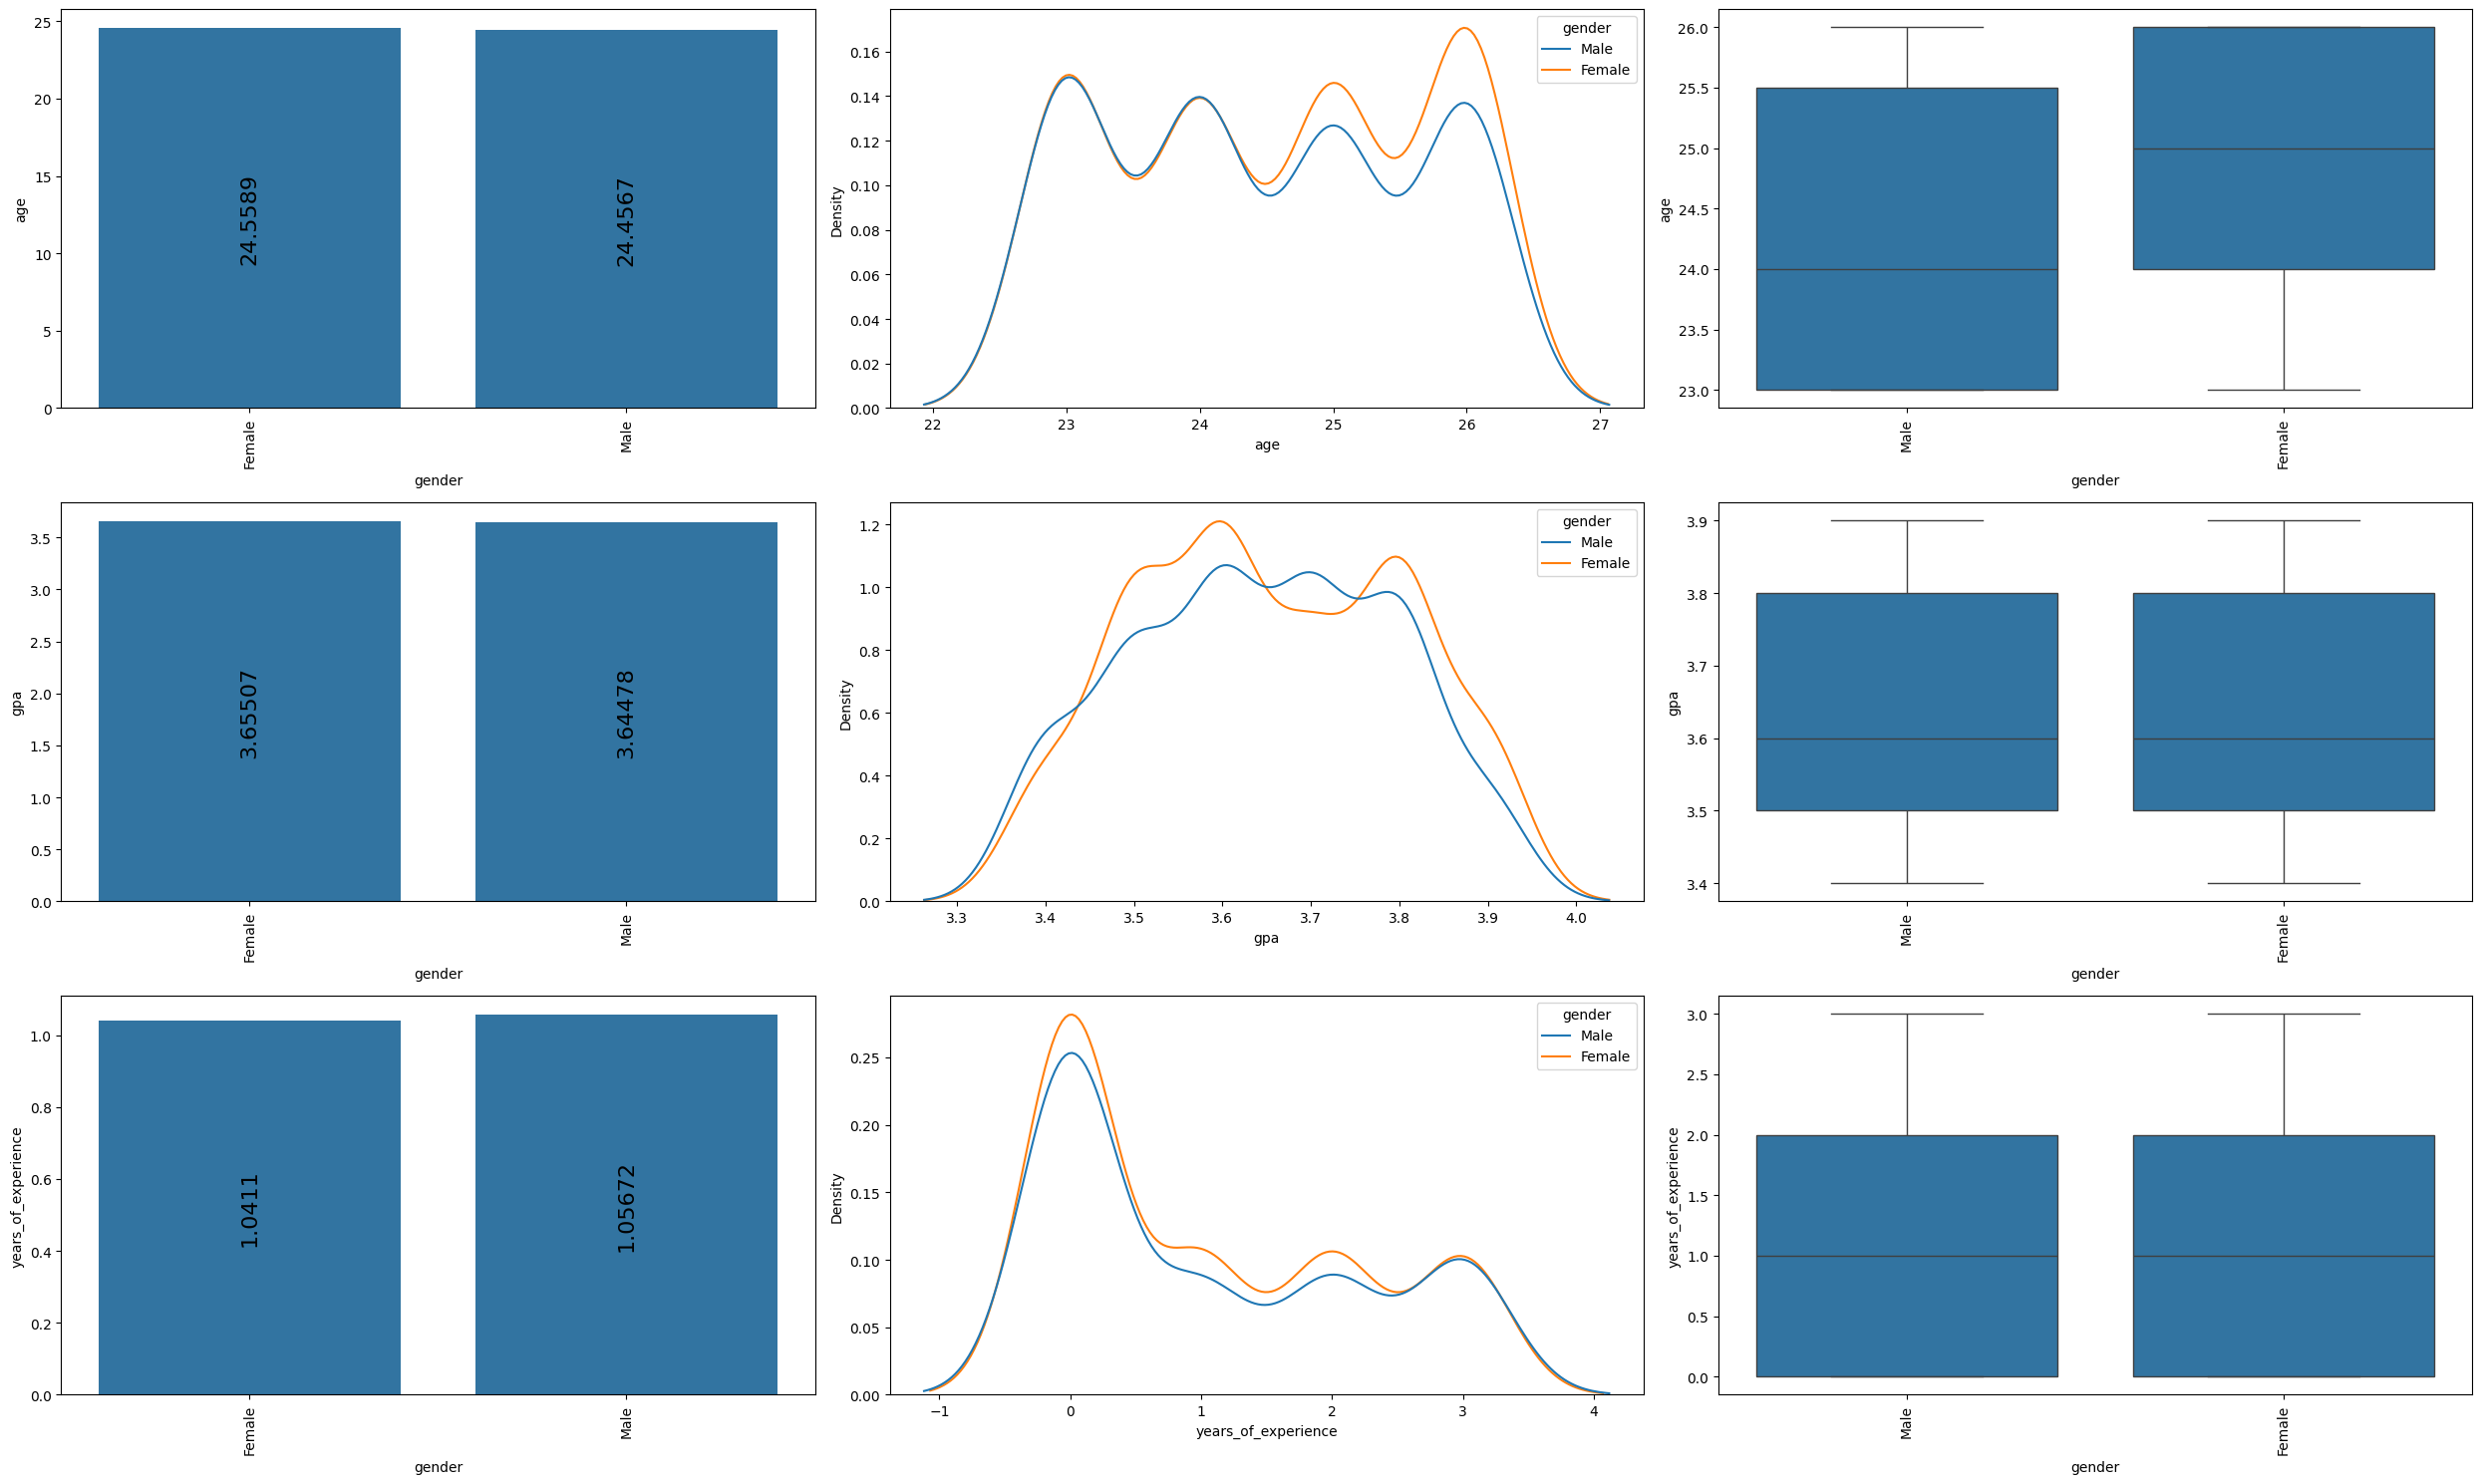

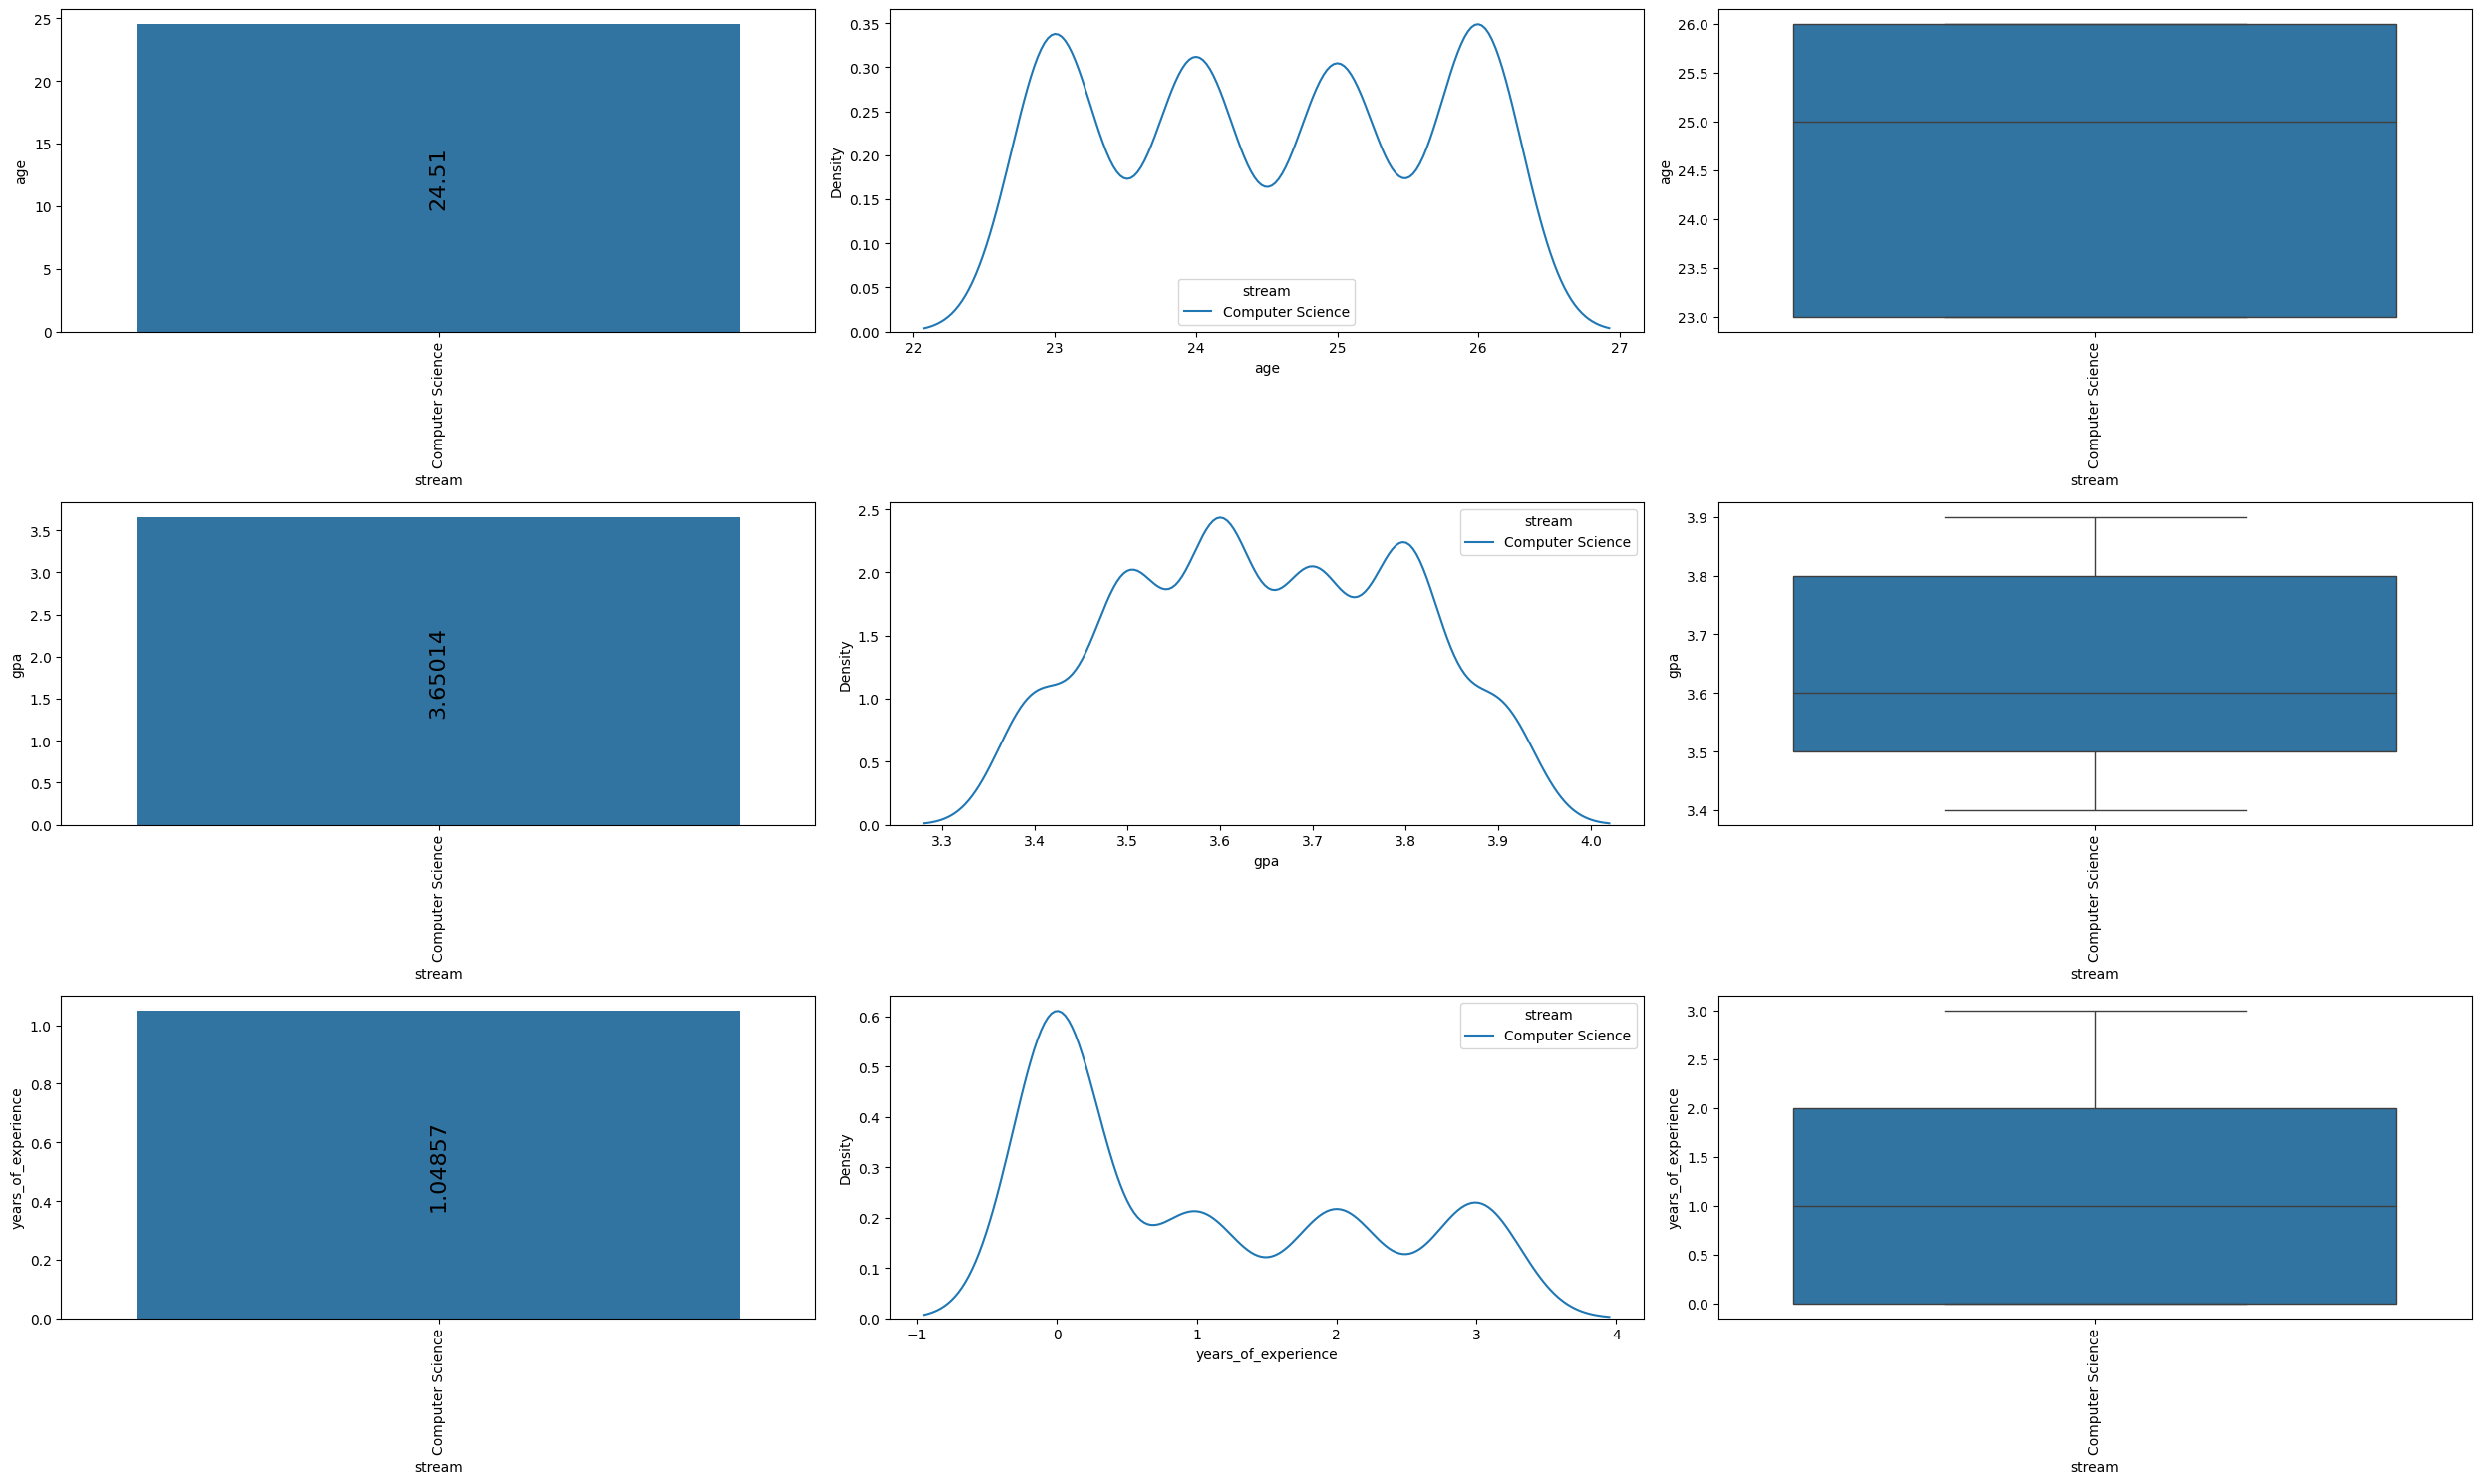

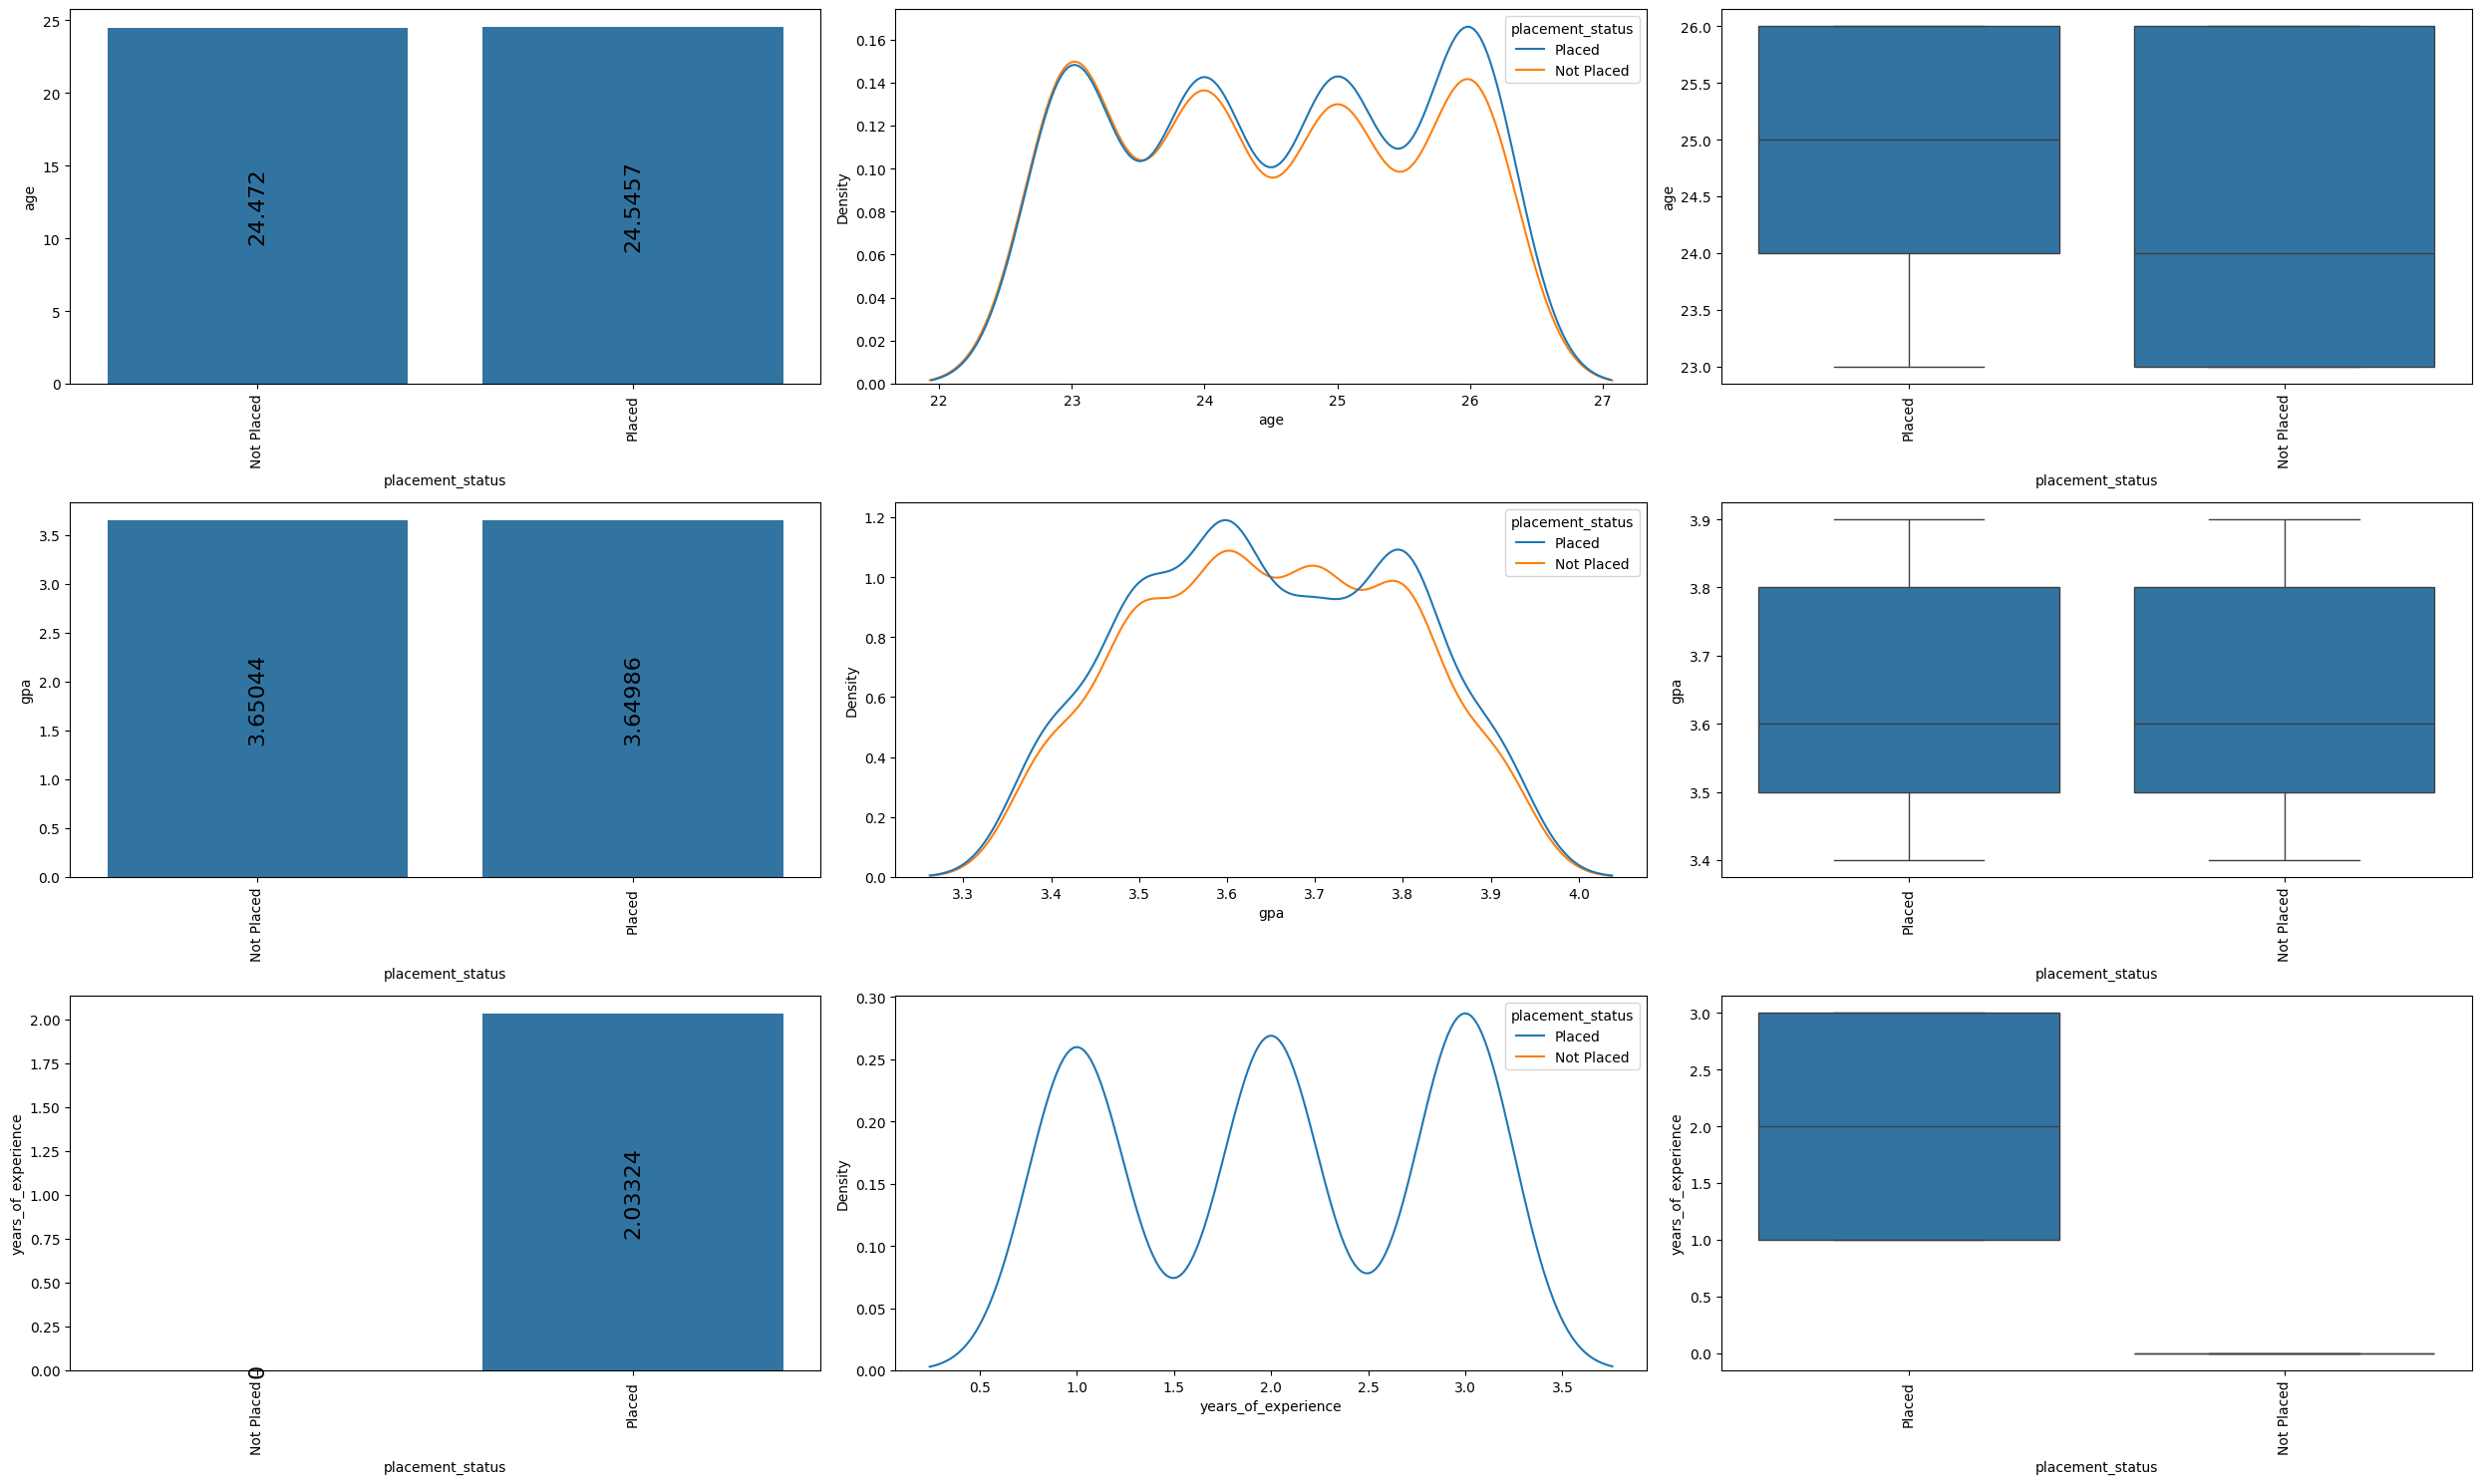

In [178]:
for i in ["gender", "stream", "placement_status"]:
    index = 0
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
    for j in ["age", "gpa", "years_of_experience"]:
        plots(df, i, j, axes[index])
        index += 1
    plt.tight_layout()
    plt.show()

##Salary distribution among placed students

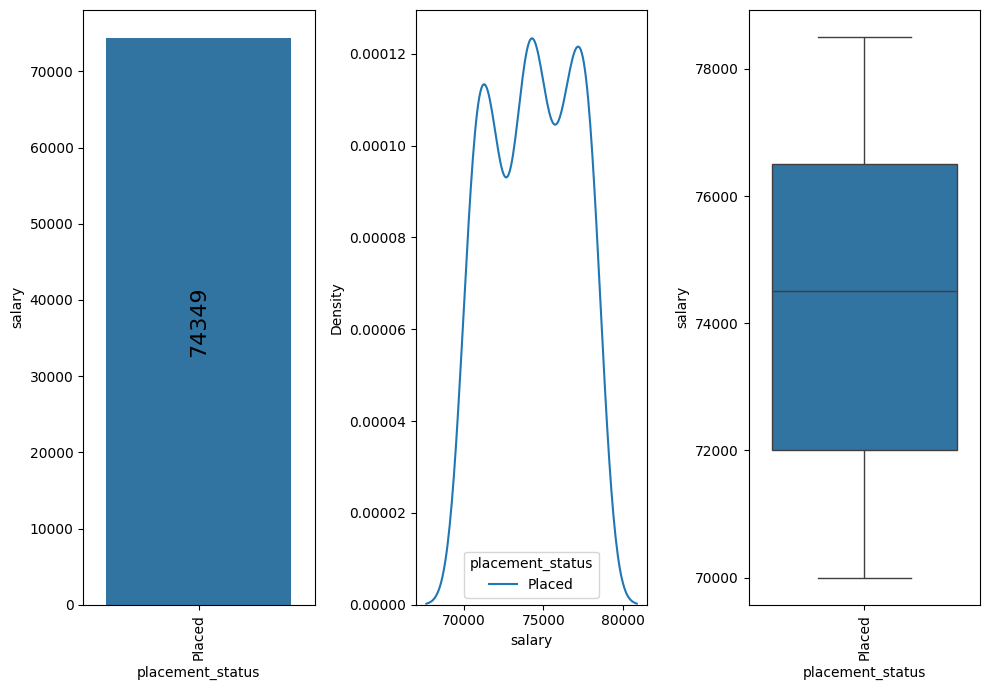

In [179]:
temp_df = df[df["placement_status"] == "Placed"].copy()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 7))
plots(temp_df, "placement_status", "salary", axes)
plt.tight_layout()
plt.show()

##Salary of placed students among and influence of gender and faculty

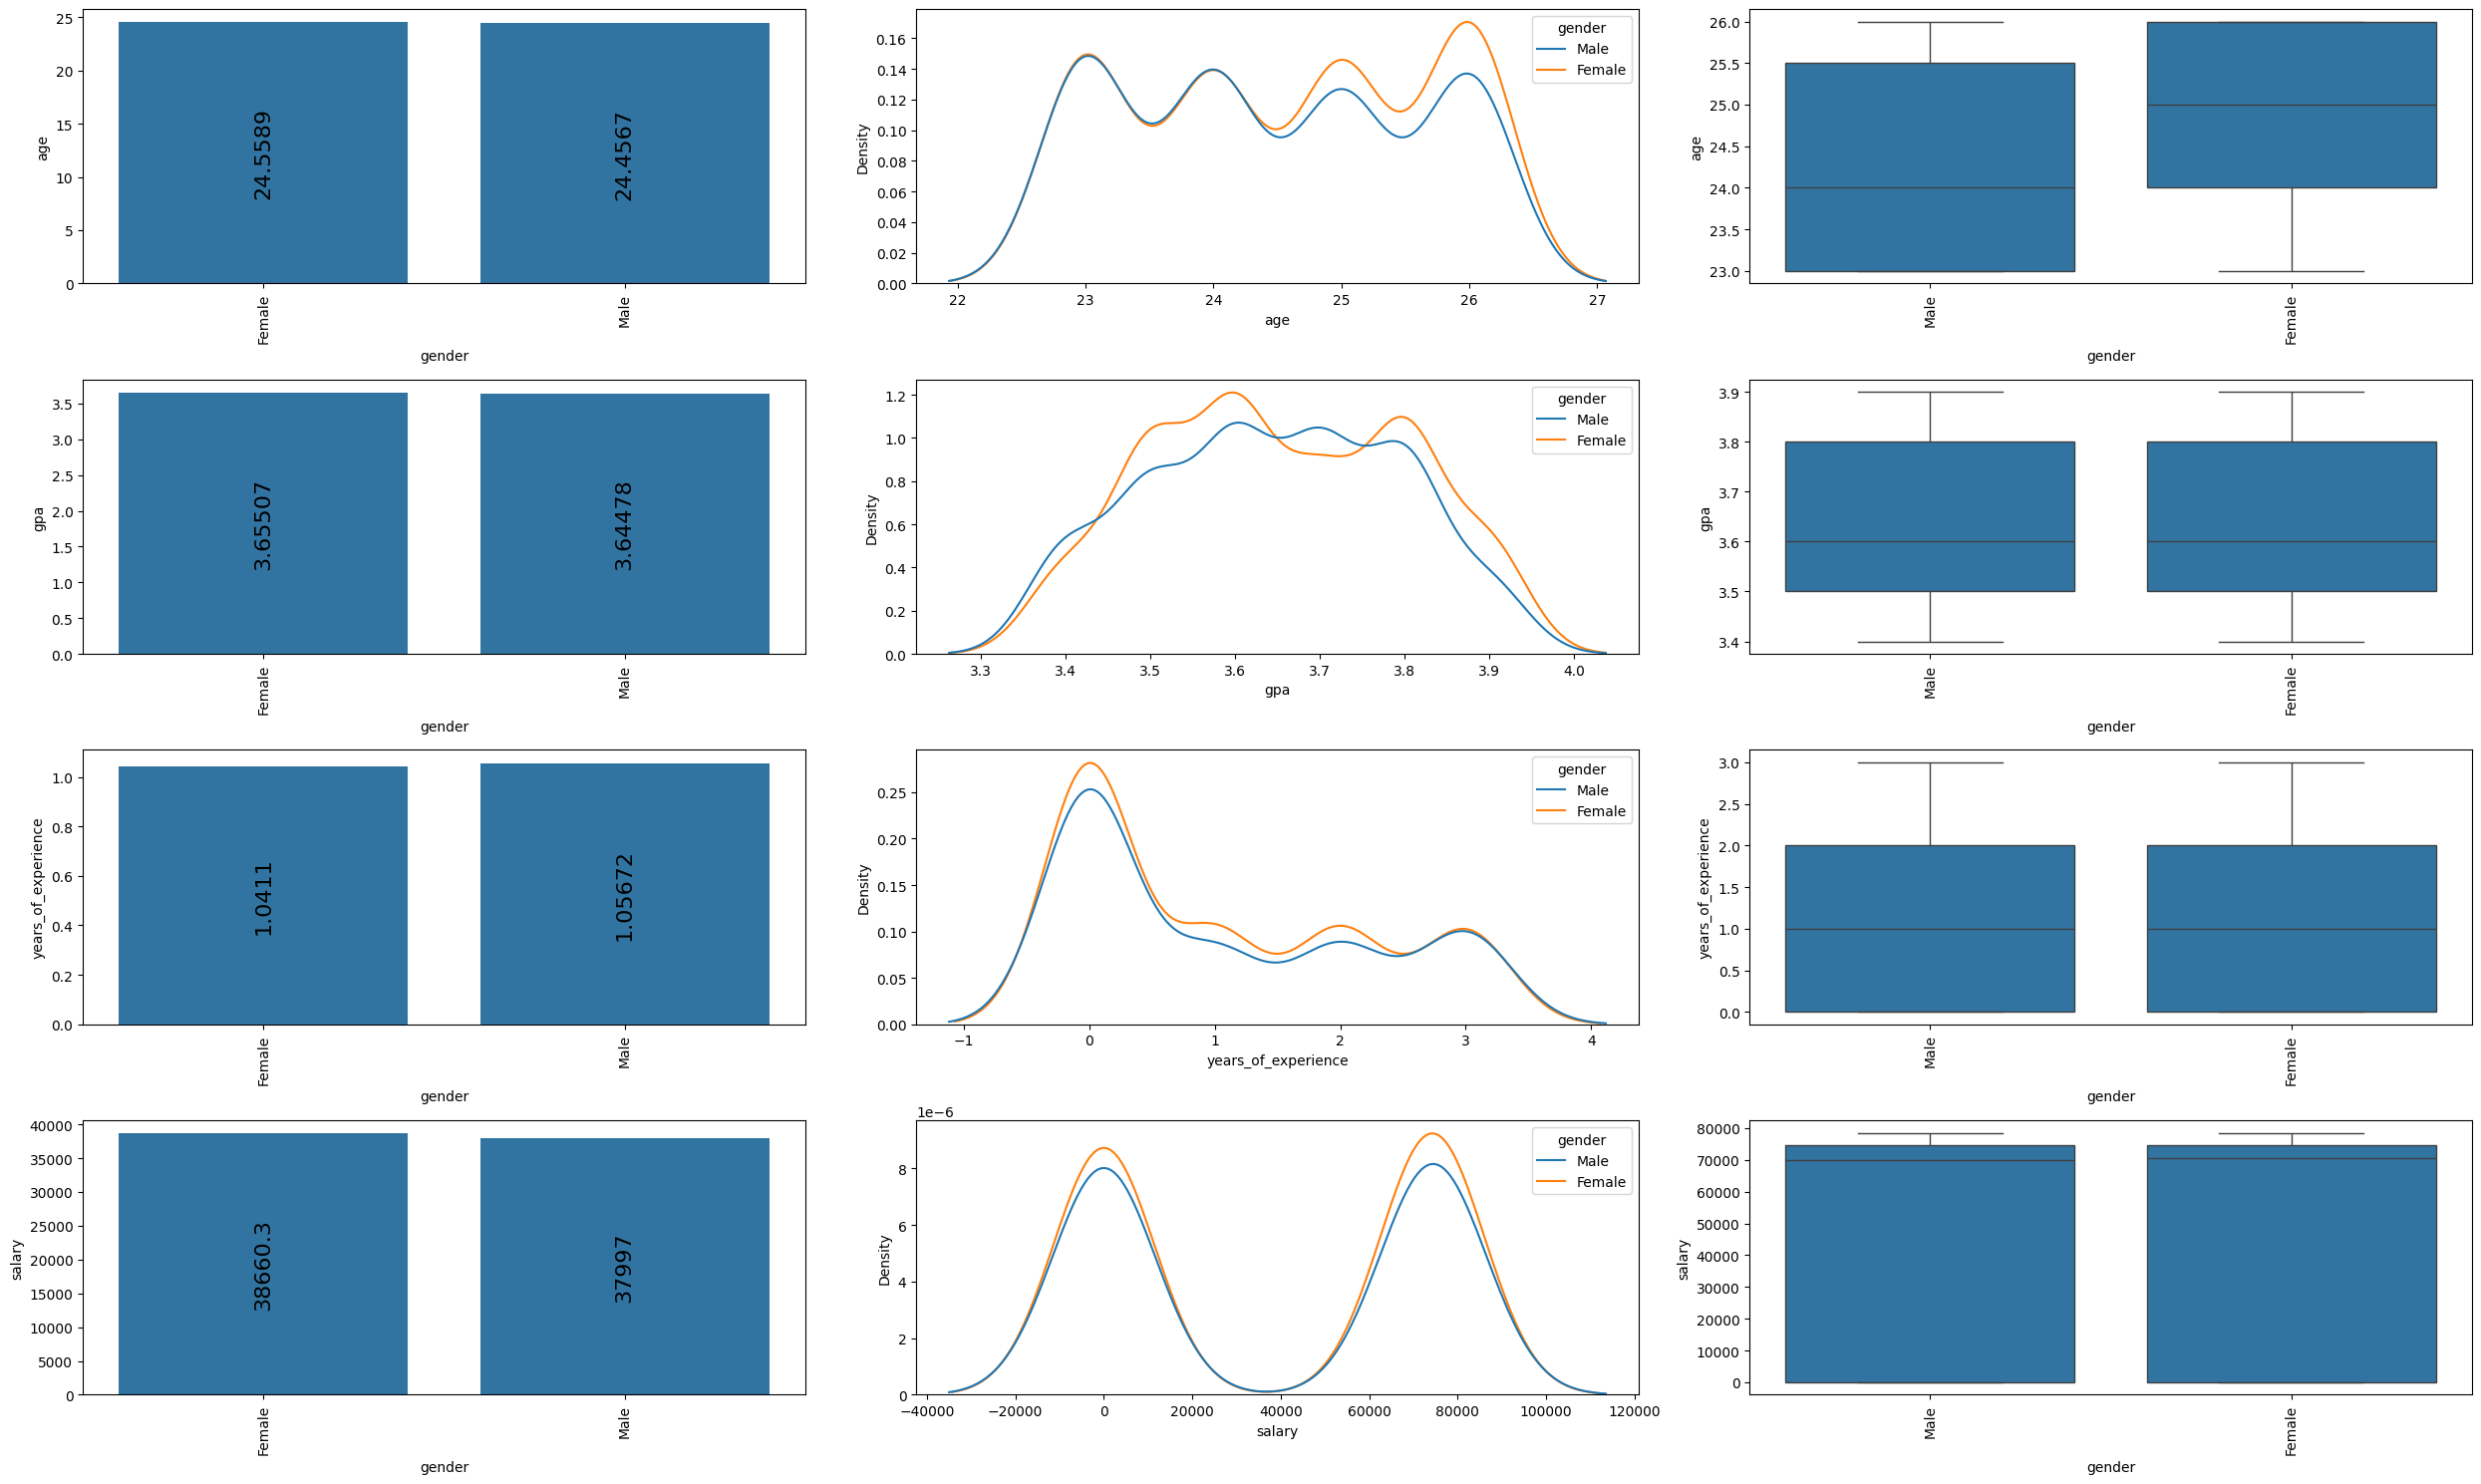

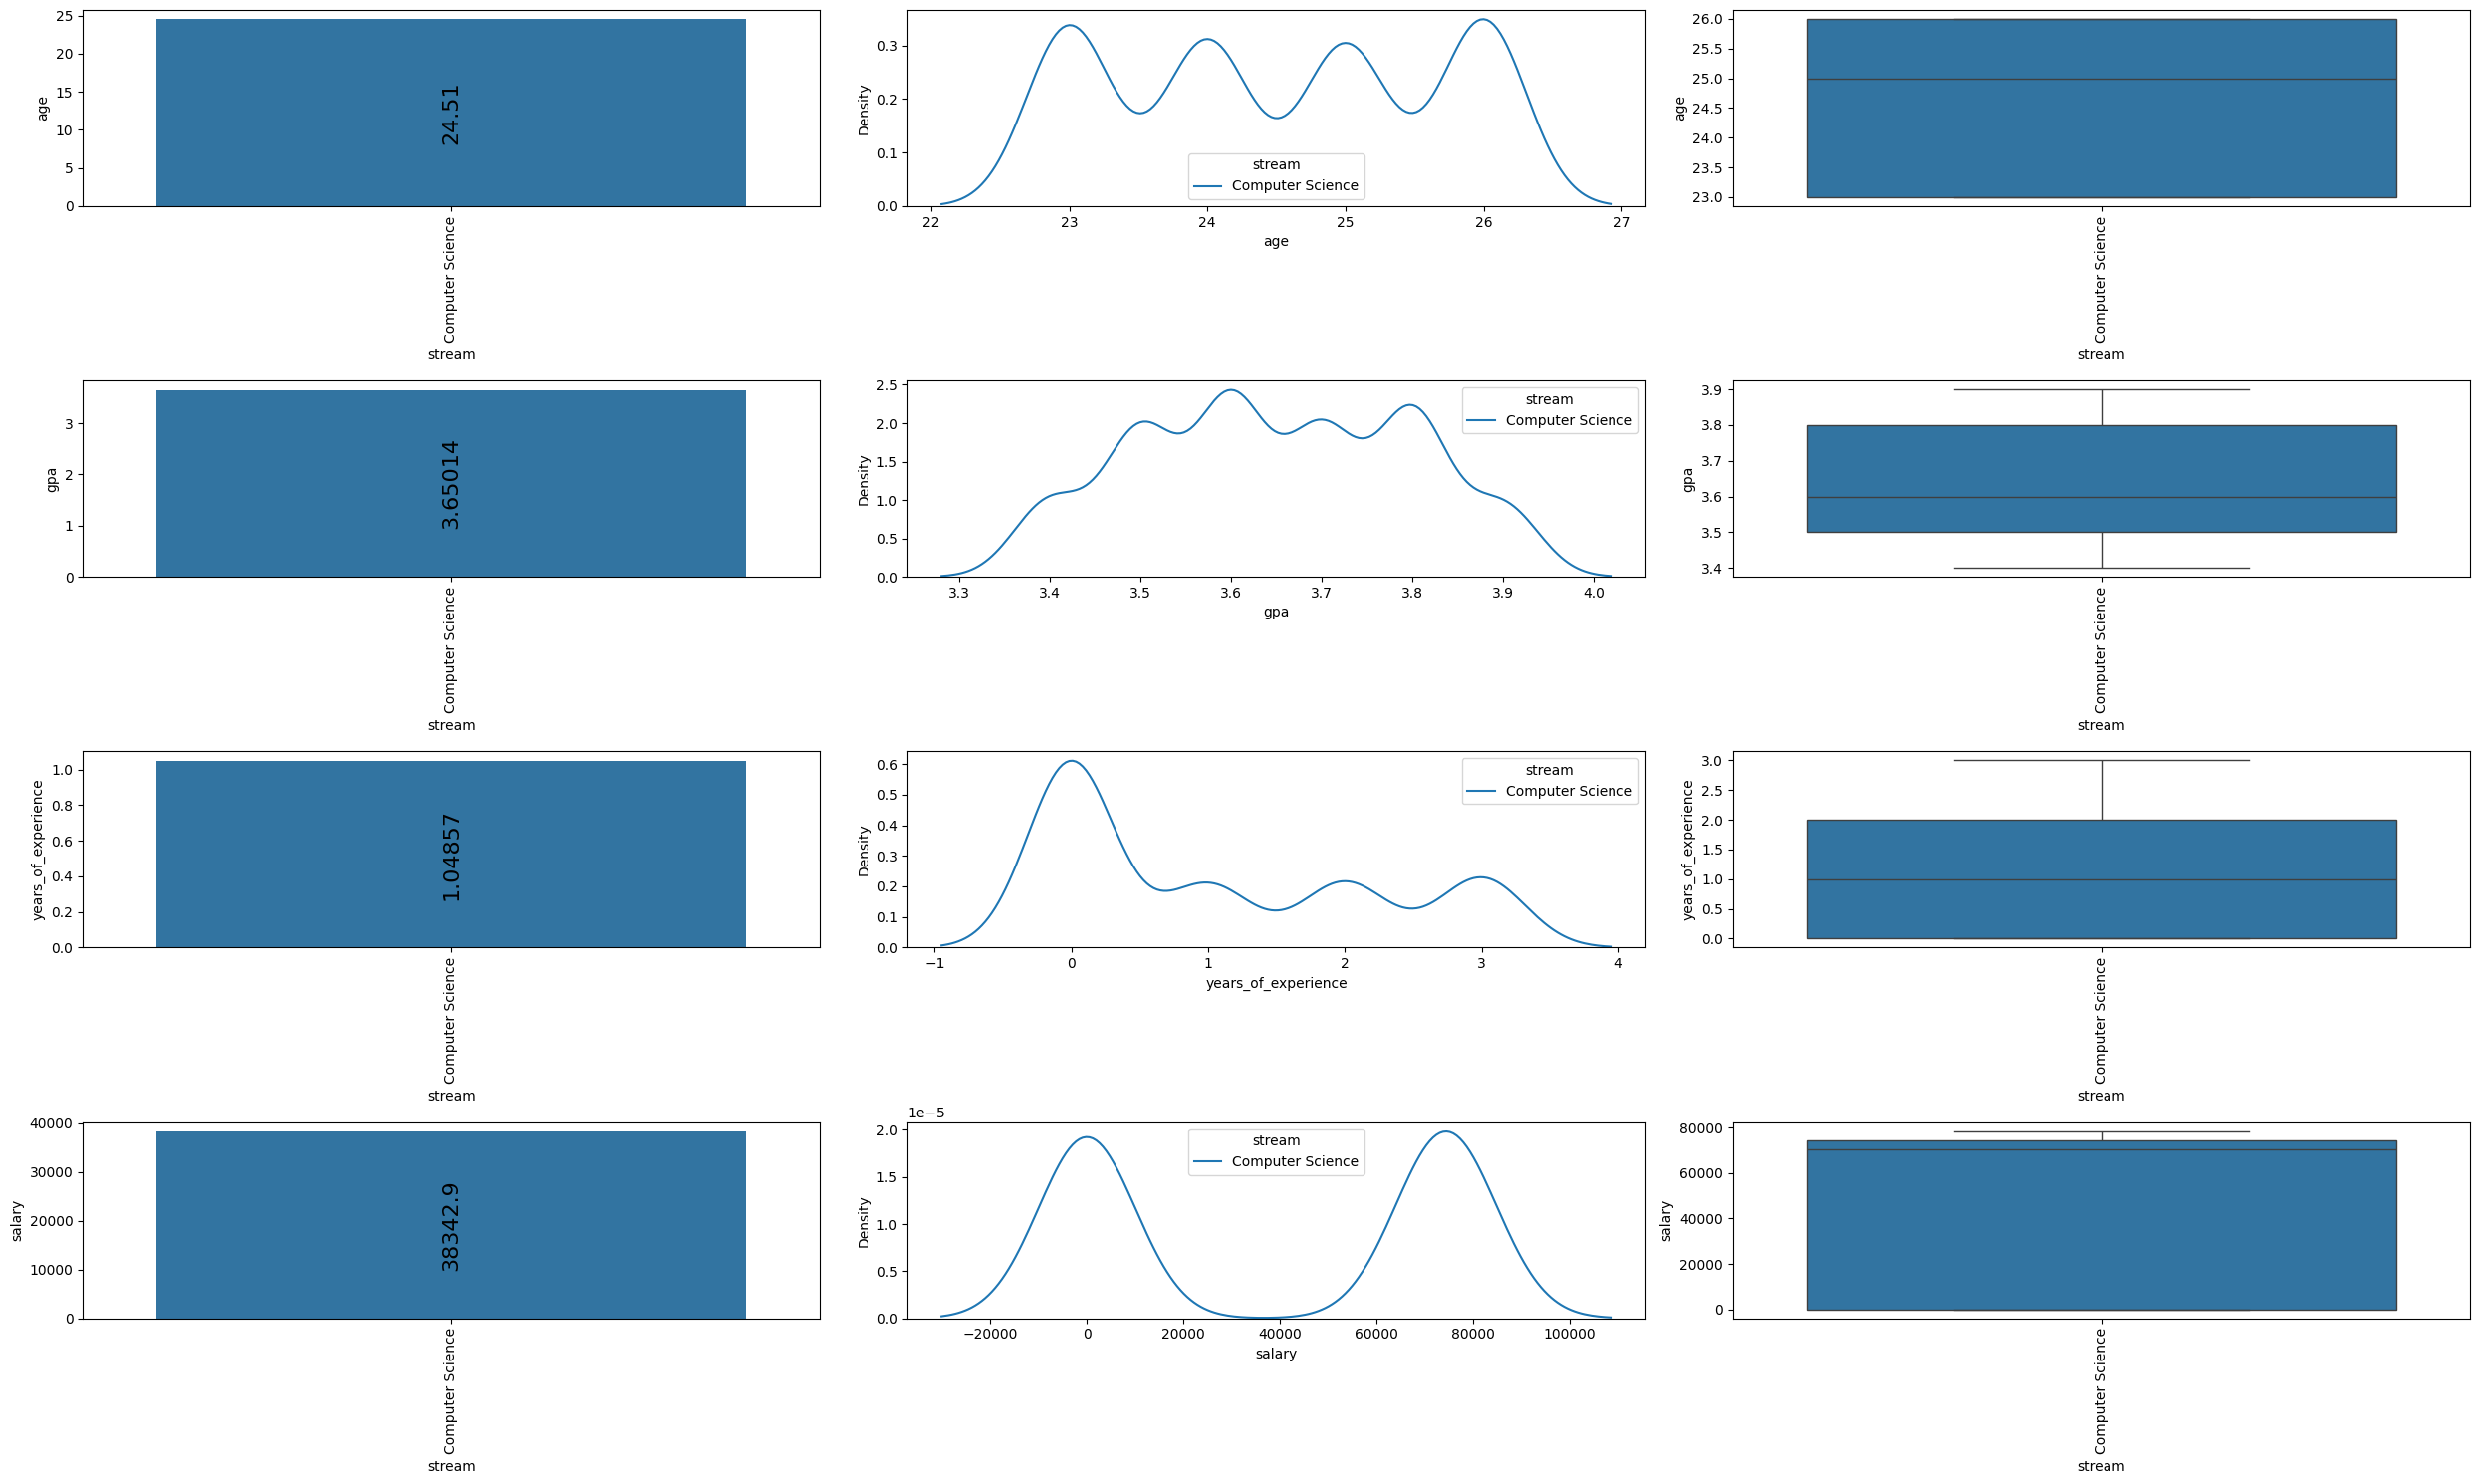

In [180]:
for i in ["gender", "stream"]:
    index = 0
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 15))
    for j in ["age", "gpa", "years_of_experience", "salary"]:
        plots(df, i, j, axes[index])
        index += 1
    plt.tight_layout()
    plt.show()

In [181]:
le = LabelEncoder()

for i in ["gender", "placement_status"]:
    df[i] = le.fit_transform(df[i])

In [182]:
features = ["gender", "age", "gpa", "years_of_experience"]

In [183]:
df

,name,gender,age,degree,stream,college_name,gpa,salary,years_of_experience,placement_status
0,Jessica Smith,1,24,Bachelor's,Computer Science,Carnegie Mellon University,3.8,75000.0,2.0,1
1,James Lee,0,23,Bachelor's,Computer Science,"University of California, Berkeley",3.7,0.0,0.0,0
2,Sarah Brown,0,23,Bachelor's,Computer Science,Massachusetts Institute of Technology,3.9,0.0,0.0,0
3,Amanda Lee,1,24,Bachelor's,Computer Science,University of Chicago,3.8,78000.0,3.0,1
4,Michael Brown,1,24,Bachelor's,Computer Science,California Institute of Technology,3.4,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
695,Emily Smith,1,26,Bachelor's,Computer Science,University of Michigan,3.6,74000.0,2.0,1
696,David Johnson,0,23,Bachelor's,Computer Science,Harvard University,3.5,76500.0,3.0,1
697,Amanda Hernandez,0,24,Bachelor's,Computer Science,University of Michigan,3.9,0.0,0.0,0
698,Sarah Wilson,0,25,Bachelor's,Computer Science,University of Chicago,3.8,0.0,0.0,0


##Correlation Matrix

In [184]:
#Create a correlation matrix to show relationship between select variables
corr_matrix = df.corr()
corr_matrix

,gender,age,gpa,salary,years_of_experience,placement_status
gender,1.000000,-0.044650,-0.034834,-0.008906,0.006648,-0.010096
age,-0.044650,1.000000,0.024543,0.030955,0.008155,0.032230
gpa,-0.034834,0.024543,1.000000,0.009045,0.004083,-0.001967
salary,-0.008906,0.030955,0.009045,1.000000,0.888474,0.998762
years_of_experience,0.006648,0.008155,0.004083,0.888474,1.000000,0.865718
placement_status,-0.010096,0.032230,-0.001967,0.998762,0.865718,1.000000


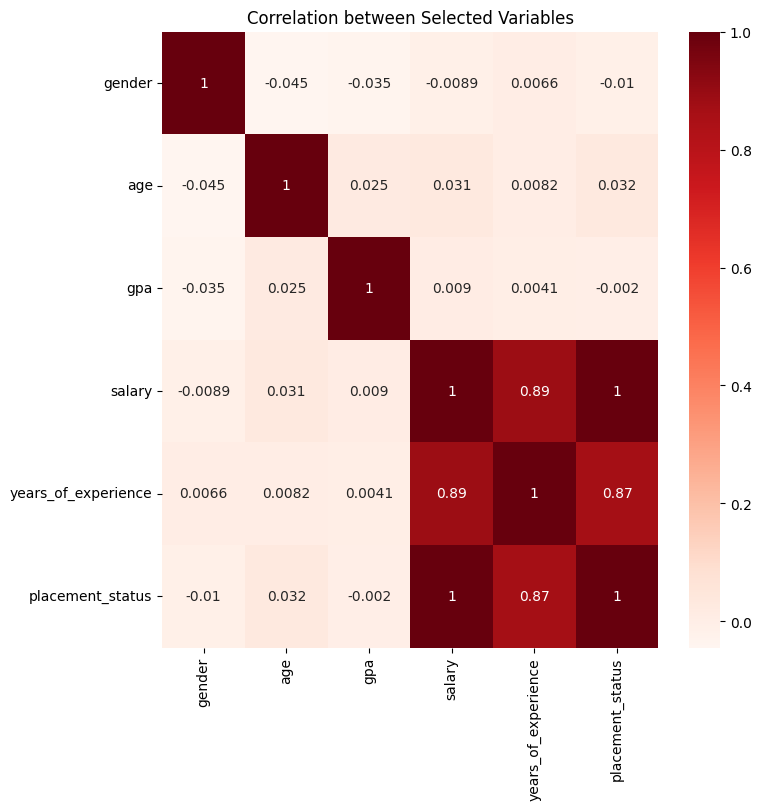

In [185]:
#Create a heatmap to visualize correlation
plt.figure(figsize=[8,8])
sns.heatmap(corr_matrix,annot=True,cmap='Reds')
#sns.heatmap(corr_matrix,cmap='Reds')
plt.title("Correlation between Selected Variables")
plt.show()

##Classification of students whether they would be placed or not

##SMOTE technique to deal with class imbalances and scaling values

In [192]:
xc = df.loc[:, features].values
yc = df.loc[:, "placement_status"].values

scaler = MinMaxScaler()
xc = scaler.fit_transform(xc)

xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, random_state=42, test_size=0.2)
smote = SMOTE()
xc_train, yc_train = smote.fit_resample(xc_train, yc_train)

In [193]:
def training_classifier(model, name, ax):
    model.fit(xc_train, yc_train)
    pred = model.predict(xc_test)
    filename = f'{name}.sav'
    pickle.dump(model, open(filename, 'wb'))
    score = accuracy_score(yc_test, pred)
    report = classification_report(yc_test, pred)
    cm = confusion_matrix(yc_test, pred)
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_title("{}: {}%".format(name, round(score*100, 2)))
    return report

##Classification models

In [194]:
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier(learning_rate=0.9)
abc = AdaBoostClassifier(learning_rate=0.9)
lgr = LogisticRegression(C=0.9)
xgbc = XGBClassifier(learning_rate=0.9)

dtc = DecisionTreeClassifier(random_state=0)
gnb = GaussianNB()

models = [rfc, etc, dtc, gbc, abc, lgr, gnb, xgbc]

names = ["Random Forest", "Extra Trees", "Decision Tree", "Gradient Boosting",
        "Ada Boosting", "Logistic Regression", "Naive Bayes", "XGBoost"]

##Evaluation visualised

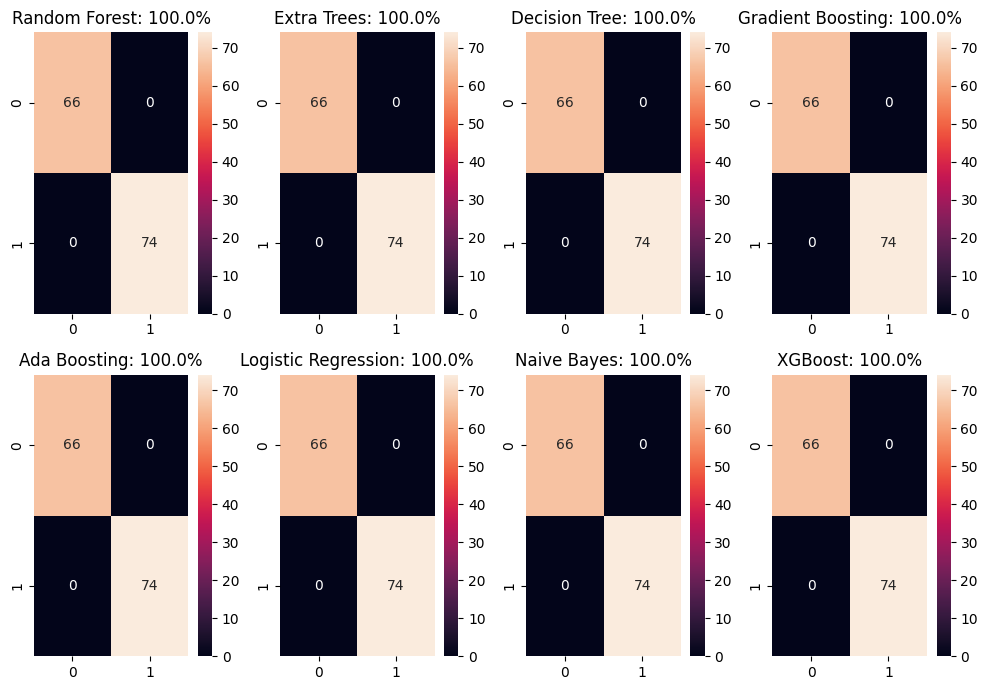

In [195]:
reports = []
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 7))
index = 0
for i in range(2):
    for j in range(4):
        reports += [training_classifier(models[index], names[index], axes[i][j])]
        index += 1
plt.tight_layout()
plt.show()

##Reports for each model

In [196]:
for i, j in zip(names, reports):
    print("*"*50)
    print(i)
    print(j)
    print("\n\n")

**************************************************
Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        74

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140




**************************************************
Extra Trees
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        74

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140




**************************************************
Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00     

##Regression to predict salary for placed students

##Scaling data

In [202]:
features

['gender', 'age', 'gpa', 'years_of_experience']

In [203]:
data = df.loc[df["placement_status"] == 1, features+["salary"]].values
data = scaler.fit_transform(data)

xr = data[:, :-1]
yr = data[:, -1]

xr_train, xr_test, yr_train, yr_test = train_test_split(xr, yr, random_state=42, test_size=0.2)

In [198]:
data

array([[1.        , 0.33333333, 0.8       , 0.5       , 0.58823529],
       [1.        , 0.33333333, 0.8       , 1.        , 0.94117647],
       [0.        , 0.33333333, 0.2       , 0.        , 0.05882353],
       ...,
       [1.        , 1.        , 0.4       , 0.5       , 0.47058824],
       [0.        , 0.        , 0.2       , 1.        , 0.76470588],
       [1.        , 0.66666667, 0.        , 1.        , 0.70588235]])

In [204]:
# def training_regressor(model):
#     model.fit(xr_train, yr_train)
#     pred = model.predict(xr_test)
#     mse = mean_squared_error(yr_test, pred)
#     r2 = r2_score(yr_test, pred)
#     print("MSE: ", mse)
#     print("r2: ", r2)
#     return pred

def training_regressor(model):
    model.fit(xr_train, yr_train)
    pred = model.predict(xr_test)
    combined_data = np.concatenate((xr_test, pred.reshape(-1, 1)), axis=1)
    a = scaler.inverse_transform(combined_data)
    df1 = pd.DataFrame(a,columns=["gender", "age", "gpa", "years_of_experience","salary"])
    combined_data_2 = np.concatenate((xr_test, yr_test.reshape(-1, 1)), axis=1)
    b = scaler.inverse_transform(combined_data_2)
    df2 = pd.DataFrame(b,columns=["gender", "age", "gpa", "years_of_experience","Actual_salary"])
    df2['Predicted_salary'] = df1['salary']
    mae = mean_absolute_error(df2['Actual_salary'], df2['Predicted_salary'])
    mse = mean_squared_error(yr_test, pred)
    # print(model.coef_)
    # print(model.intercept_)
    print("MAE: ", mae)
    print("MSE: ", mse)


In [205]:
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor(learning_rate=0.9)
abr = AdaBoostRegressor(learning_rate=0.9)
lnr = LinearRegression()
xgbr = XGBRegressor(learning_rate=0.9)

models = [rfr, etr, gbr, abr, lnr, xgbr]

names = ["Random Forest", "Extra Trees", "Gradient Boosting",
        "Ada Boosting", "Linear Regression", "XGBoost"]

In [206]:
for i, j in zip(models, names):
    print("*"*50)
    print(j)
    training_regressor(i)
    print("\n\n")

**************************************************
Random Forest
MAE:  0.8219178082265537
MSE:  1.1376025027254764e-07



**************************************************
Extra Trees
MAE:  6.179580439443457e-12
MSE:  7.348715485334222e-31



**************************************************
Gradient Boosting
MAE:  1.4873632484383574
MSE:  1.1629972930110541e-07



**************************************************
Ada Boosting
MAE:  240.47117589044123
MSE:  0.0013249299186690485



**************************************************
Linear Regression
MAE:  1.5947304359854083e-12
MSE:  2.973465080071091e-31



**************************************************
XGBoost
MAE:  0.8056108438830873
MSE:  1.4706657904215538e-08





In [208]:
#features = ["gender", "age", "gpa", "years_of_experience"]
rfr.feature_importances_

array([5.14464806e-16, 7.74975809e-16, 8.37432587e-02, 9.16256741e-01])

In [209]:
import pickle
filename = 'randon_forest_model.sav'
pickle.dump(lnr, open(filename, 'wb'))

In [210]:
loaded_model = pickle.load(open(filename, 'rb'))

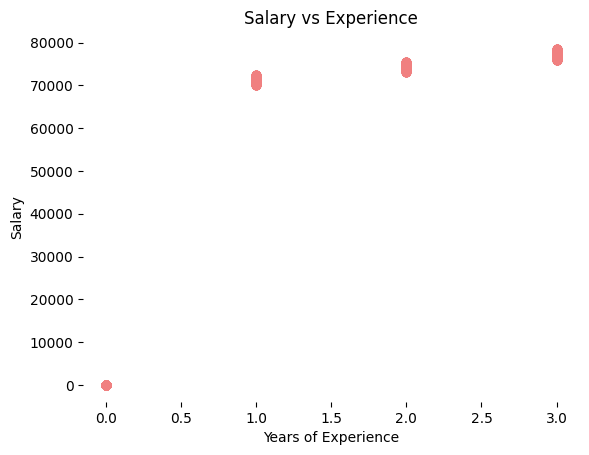

In [212]:
# Relationship between Salary and Experience
plt.scatter(df['years_of_experience'], df['salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [214]:
# ["gender", "age", "gpa", "years_of_experience"](1,27,3,3.4,1.0)
test_data = [[1,26,3.4,1.0]]
# new_test_data = scaler.fit_transform(test_data)
pred_result = loaded_model.predict(test_data)
pred_result

array([1.70588235])

In [215]:
pred_result.shape

(1,)

In [216]:
combined_data = np.concatenate((test_data, pred_result.reshape(-1, 1)), axis=1)
print(combined_data)

[[ 1.         26.          3.4         1.          1.70588235]]


In [217]:
combined_data.shape

(1, 5)

In [218]:
a = scaler.inverse_transform(combined_data)
a

array([[1.00e+00, 1.01e+02, 5.10e+00, 3.00e+00, 8.45e+04]])

In [219]:
original_test_results = a[:, :-1]
print(original_test_results)

[[  1.  101.    5.1   3. ]]


In [220]:
# Extract the prediction from the original_combined_data
original_pred_result = a[:, -1]

# Print the original prediction
print("Original prediction:", original_pred_result)

Original prediction: [84500.]
